In [56]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error,root_mean_squared_error

In [57]:
df = pd.read_csv('boston.csv')
df.info()
df.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MV       506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


MAE: 3.068293552243424
MSE: 17.877158260618103
RMSE: 4.228138864869282
R2: 0.7882343964525517
NRMSE: 0.0939586414415396


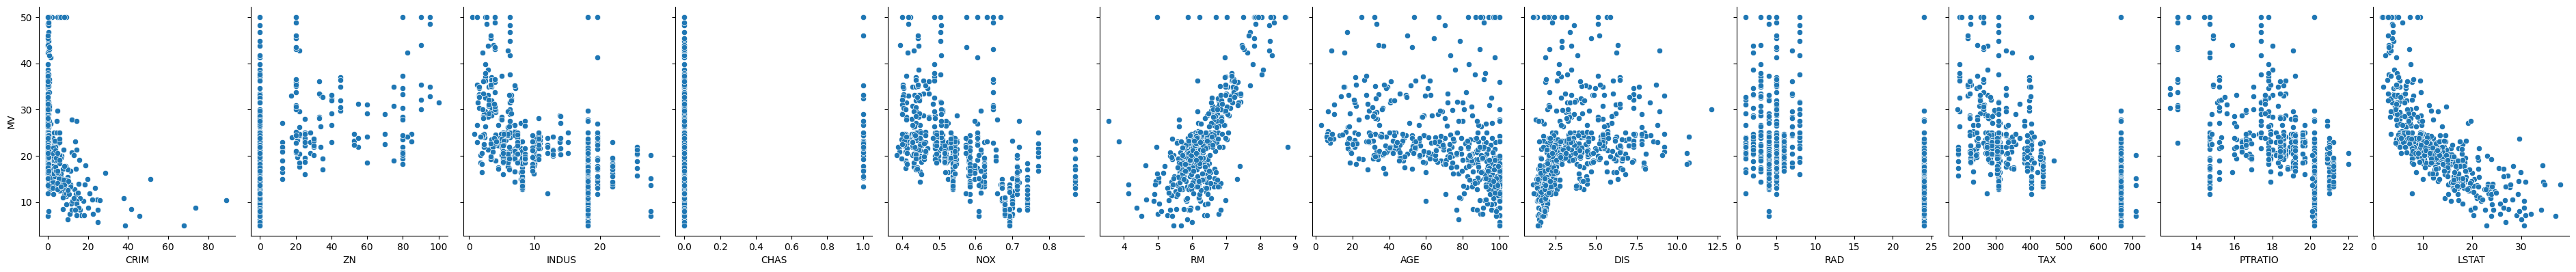

In [60]:

df = pd.read_csv("boston.csv")
X = df.iloc[:, :-1]
y = df.iloc[:, -1]



y_pred = model.predict(x)



#evaluate
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
y_max = y.max()
y_min = y.min()
nrmse = rmse / (y_max - y_min)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)
print('NRMSE:', nrmse)


x_vars = df.columns.drop('MV')
sns.pairplot(data=df, y_vars=['MV'], x_vars=x_vars, height=4, aspect=0.8)
plt.show()






                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 25 Sep 2025   Prob (F-statistic):          2.23e-133
Time:                        12:28:42   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.0

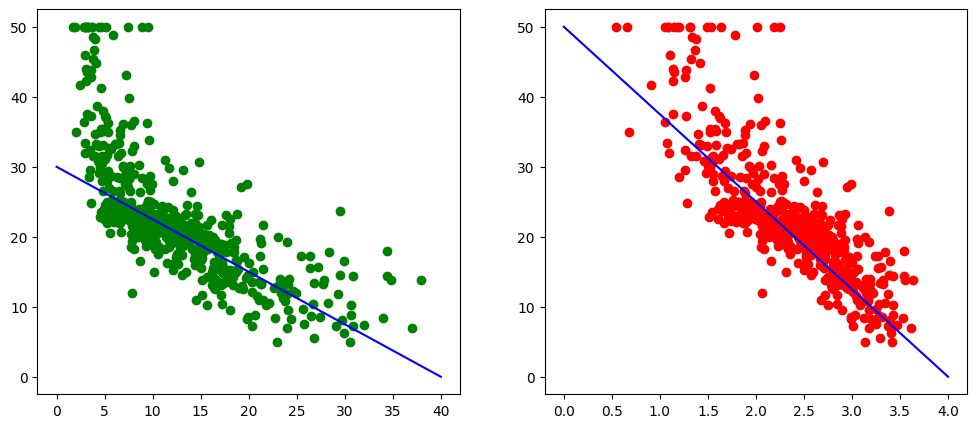

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np



# Read dataset into a DataFrame
df = pd.read_csv("boston.csv")

# Separate explanatory variables (x) from the response variable (y)
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Build and evaluate the linear regression model
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
pred = model.predict(x)
model_details = model.summary()
print(model_details)


"""Non-linear transformation of LSTAT variable"""

# Re-read dataset into a DataFrame
df = pd.read_csv("boston.csv")

# Apply non-linear transformation
df["LOG_LSTAT"] = df["LSTAT"].apply(np.log)

# Rearrange the variables so that MV appears as the last column
df = df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT','LOG_LSTAT','MV']]

# Visualise the effect of the transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df["LSTAT"], df["MV"], color="green")
ax1.plot([0, 40], [30, 0], 'b-')
ax2.scatter(df["LOG_LSTAT"], df["MV"], color="red")
ax2.plot([0, 4], [50, 0], 'b-')

"""
RE-RUN THE LINEAR REGRESSION MODEL WITH A TRANSFORMED VARIABLE
"""
# Drop the original LSTAT variable
df = df.drop("LSTAT", axis=1)

# Separate explanatory variables (x) from the response variable (y)
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Build and evaluate the linear regression model
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
pred = model.predict(x)
model_details = model.summary()
print(model_details)


"""
SINCE LOGSTAT WORKS BETTER THAN LSTAT FOLLOWING THE LINEAR TRANSFORMATION:
1. WRITE THE TRANSFORMED DATAFRAME INTO A .CSV FILE
2. RE-RUN THE LINEAR REGRESSION MODEL USING SKLEARN
"""

# # write dataframe to .csv
df.to_csv("boston_logstat.csv", index=False)
